#Final ML Project: Code and Report  

**Complete by:** 6:00 p.m., Wednesday, April 23 **Note**: This date is set by the University, however, in this course, you may have additional time after Reading Day, to 11:59 p.m., Monday, April 28.




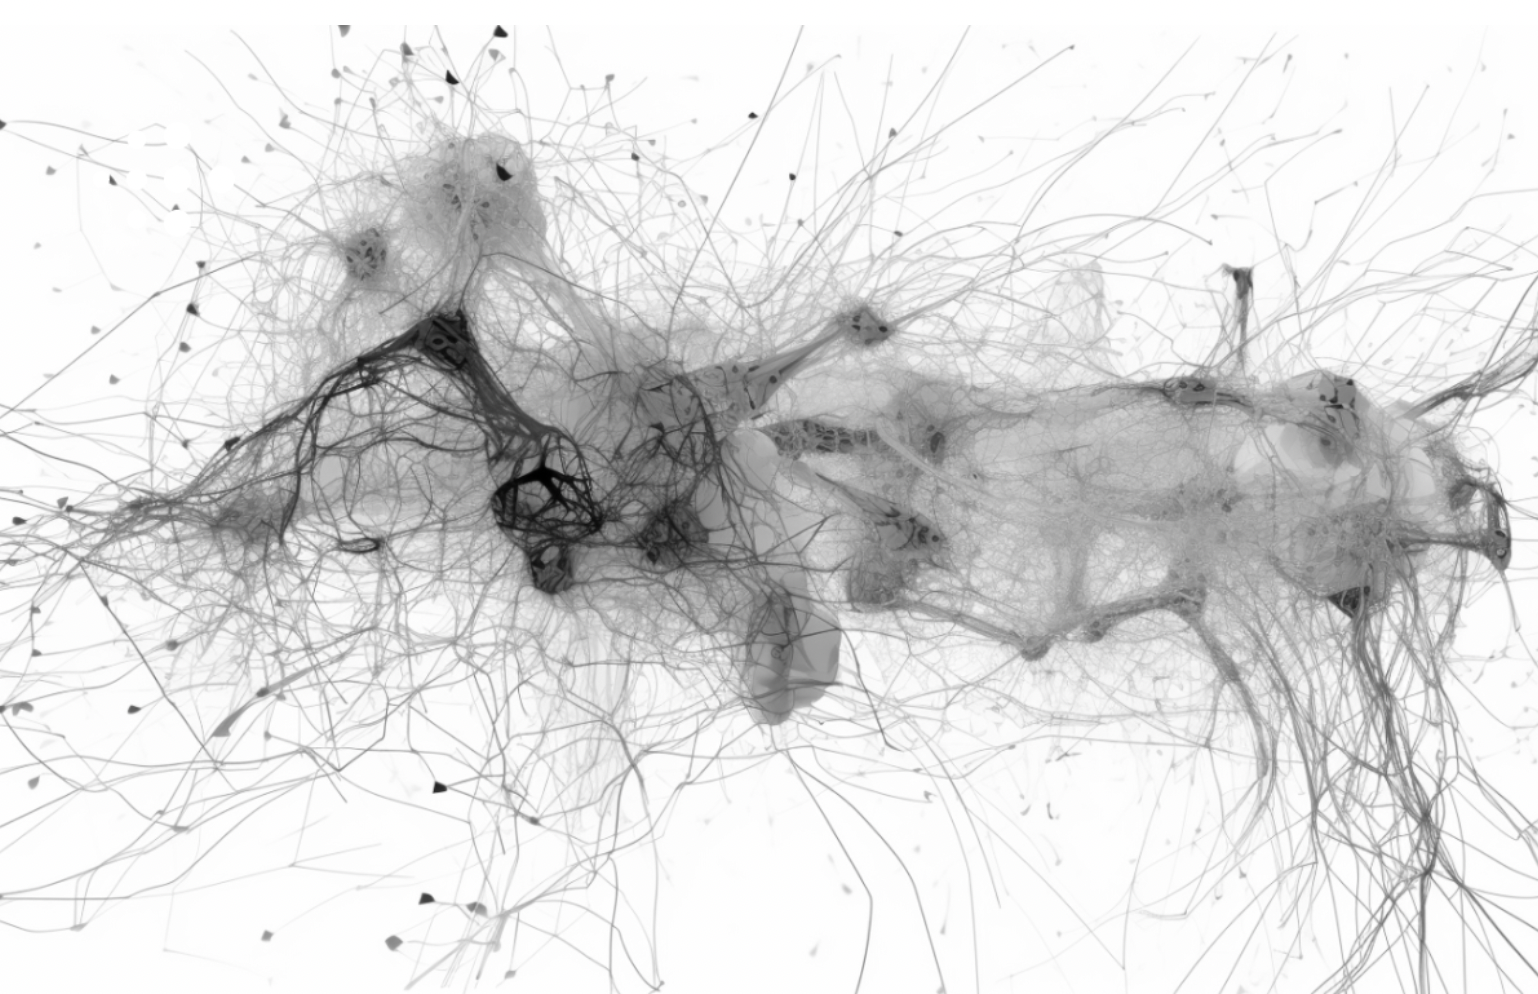

# Introduction

Over the millennia that beer has been around for, hundreds of beer styles have been developed by brewers all over the world. Each style has its own myriad of flavor profiles as well as other characteristics such as color and textures. This can make it difficult for newer and less experienced brewers to understand which beer styles may be good fits for any ideas they have. For example, a brewer may want to create a beer with chocolate and coffee flavors but may not know which beer styles may best fit this flavor profile. This project aims to give brewers an easy and fast way to find beer styles that best fit desired flavor profiles and descriptions.

The data used shows how descriptions provided by reviewers or breweries about a specific beer can be used to classify other descriptions to a particular beer style. Therefore, this allows us to understand that beer classification is simple provided descriptions are well written and are in good quantity. If the data allows us to make accurate style suggestions it will potentially make the brewing field more accessible for new brewers.

If this project was brought to large scale it would introduce ethical and logistical issues. This data used consists of descriptions of beer styles which most likely come from the breweries that created each individual beer. If more data was to be collected, issues may arise from taking copyrighted writing from brewery’s products for the descriptional data. This might also create logistical issues for gathering the data as web scraping would need to be used. Additionally, many breweries may not list their products on a website meaning the only way to get data would be to visit breweries in person.

The dataset used for this project:

https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set?select=beer_profile_and_ratings.csv

# Data Explanation

The dataset used for this project contained information on tasting profiles for over 3000 unique beers. Over 100 styles are represented by the beers in the dataset. Specifically the dataset contained 25 columns and 3197 rows. The dataset contained information such as the name of the beer, the style, brewery, and description. Other information such as alcohol content and tasting profile information was present but not used. For this project I only focused on the style and description columns of the data. These columns provided a pairing of each beer style with a description of the overall flavors, textures, and colors of the beer. The idea was all the descriptions used for a single beer style would create a characterization for the style. For example all the Stout style beers might contain the word “chocolate” or “coffee” in their descriptions. So if a user said they wanted chocolate and coffee flavors a Stout style may be recommended to them.

Many preprocessing steps were required to make this data effective for a machine learning algorithm. Initially, filtering steps were needed to cut down the dataset to only the column I wanted to focus on. This left only “Style” and “Description” information. Each description would later serve to predict a style. However, there was a problem with the “Description” column of the dataset. Every cell contained a prefix of “Notes:”. Even entries that did not contain a description still had this prefix present. So I first removed all entries that contained just the prefix meaning that there was no description. I then created a function that could be applied to entries containing a description to remove every prefix. This was necessary because I did not want the presence of the prefix in every description to throw the model off. This function used the .split() function to separate the usable part of the description from the prefix [1]. It was then applied to the entire dataset which finished initial preparation.

Vectorization of the data was the next step in the processing. The algorithm I chose to utilize requires data to be vectorized. Based on previous classwork, I used a TfidfVectorizer to measure the importance of each word in the descriptions. After all the descriptions were vectorized they were put into a DataFrame that used the styles for indices and columns of feature names from the vectorization. The DataFrame was necessary to make as the used algorithm requires one for training input.

Due to the chosen algorithm no data splitting was necessary. The full amount of data was used for training and predictions.


#Algorithms and Technique Analysis

The machine learning technique used for the project was the K-Means classification algorithm. I wanted to use a classification algorithm because the fundamental idea behind the project was to classify a user’s description to a style of beer. Although there are other classification algorithms I chose K-Means because of its power to provide multiple classification possibilities. This is accomplished by the clustering design of the algorithm. Not every style in a cluster is the same. Although there may be a style that is most common there could be second or even third options as well. Since I wanted to provide suggestions for beer styles and not a definitive style, this feature of the algorithm allowed me to provide the user a list of the top three suggestions. I was able to use the algorithm to get a single predicted cluster from the user’s description. I then looked at the three most common styles present in that cluster by using a measure of the mode and ordered them most to least common and ranked my recommendations based on that ordering. Additionally, the K-means algorithm allowed me to classify things in large scale unlike a logistic regression model which only allows a boolean classification.

The only parameter that was important for me when training the algorithm was the number of clusters. In this case, the number of clusters would represent the number of unique beer styles present from the dataset. After processing the data I was able to find this number by looking at the number of unique “Style” values. This led to a k-value of 110 meaning there were 110 beer styles that had valid descriptions for them. Each description would be part of one or more of these 110 clusters.

I tested the algorithm by inputting a various number of user inputs [2]. I then looked at the beer style suggestions and used a mixture of prior knowledge and internet searches to determine whether or not the suggested styles actually contained characteristics mentioned in the inputted description. I tested the more common and obvious ones first and then moved to more discrete and less concrete descriptions. One of the first tests involved concrete flavors such as “fruit” and “hops”. This correctly yielded styles such as American IPAs which often display fruity and hoppy notes. The later tests looked at less concrete characteristics such as “summer flavors” with “light and clear color”. This correctly yielded styles such as American Blonde Ales which is known as a refreshing summertime beer style and is a bright yellow color.


#Conclusion

My model shows us that it is possible to produce meaningful beer style suggestions from a dataset of descriptions of the style. This is regardless of the origin of the descriptions.

This project raises new questions for me. I wonder if there are other ways to determine a beer style that may be better. Could a list of ingredient types be more influential? This way a brewer could enter a specific type of yeast they have and see which beer styles use it. Are there other algorithms that could do a better job at the classifications? If the dataset was more large scale and contained double the amount of styles would K-means still be effective?


#Visualization

**Located in code cell below**

This visualization shows each beer and its predicted cluster. It is a good way to see the number of clusters and where similar beers are in the beer index.


#Project Code



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/beer_profile_and_ratings.csv')

In [ ]:
df_usable = df[['Style', 'Description']]
df_usable

,Style,Description
0,Altbier,"Notes:Richly malty and long on the palate, wit..."
1,Altbier,"Notes:This malty, full-bodied double alt is al..."
2,Altbier,Notes:Long Trail Ale is a full-bodied amber al...
3,Altbier,Notes:
4,Altbier,Notes:Called 'Dark Double Alt' on the label.Se...
...,...,...
3192,Winter Warmer,Notes:
3193,Winter Warmer,Notes:This hearty American pale ale contains a...
3194,Winter Warmer,Notes:
3195,Winter Warmer,Notes:


In [ ]:
df_usable = df_usable[df_usable['Description'] != "Notes:"]
df_usable

,Style,Description
0,Altbier,"Notes:Richly malty and long on the palate, wit..."
1,Altbier,"Notes:This malty, full-bodied double alt is al..."
2,Altbier,Notes:Long Trail Ale is a full-bodied amber al...
4,Altbier,Notes:Called 'Dark Double Alt' on the label.Se...
6,Altbier,Notes:Classified as a German Altbier by the Wi...
...,...,...
3188,Winter Warmer,Notes:Our Lions Winter Ale combines premium ma...
3189,Winter Warmer,Notes:Collaboration with Jolly Pumpkin Artisan...
3190,Winter Warmer,Notes:This deep mahogany red strong ale is a c...
3193,Winter Warmer,Notes:This hearty American pale ale contains a...


In [ ]:
def removeNotes(description):
  description = str(description)
  strings = description.split(":", 1)
  if len(strings) > 1:
   return strings[1]
  else:
    return strings[0]

In [ ]:
df_usable['Description'] = df_usable['Description'].apply(removeNotes)

<ipython-input-6-e450c26df66c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usable['Description'] = df_usable['Description'].apply(removeNotes)


In [ ]:
df_usable

,Style,Description
0,Altbier,"Richly malty and long on the palate, with just..."
1,Altbier,"This malty, full-bodied double alt is also kno..."
2,Altbier,Long Trail Ale is a full-bodied amber ale mode...
4,Altbier,Called 'Dark Double Alt' on the label.Seize th...
6,Altbier,Classified as a German Altbier by the Widmer B...
...,...,...
3188,Winter Warmer,Our Lions Winter Ale combines premium malt wit...
3189,Winter Warmer,Collaboration with Jolly Pumpkin Artisan Ales ...
3190,Winter Warmer,This deep mahogany red strong ale is a classic...
3193,Winter Warmer,This hearty American pale ale contains a rich ...


In [ ]:
style = df_usable['Style']
descriptions = df_usable['Description']
k = len(df_usable['Style'].unique())

In [ ]:
vectorizer = TfidfVectorizer()
beers = vectorizer.fit_transform(descriptions)

In [ ]:
beers = pd.DataFrame(beers.toarray(), index=style, columns=vectorizer.get_feature_names_out())
beers

,000,012,02,05,056,056alcohol,057,058color,06,060,...,ölbutikken,único,über,überalt,đá,ﬁne,ﬁnish,ﬂagship,ﬂavors,ﬂoral
Style,,,,,,,,,,,,,,,,,,,,,
Altbier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Altbier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Altbier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Altbier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Altbier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winter Warmer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Winter Warmer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Winter Warmer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(beers)

KMeans(n_clusters=110)

In [ ]:
y_pred = kmeans.predict(beers)
df_usable['cluster_prediction'] = y_pred

<ipython-input-12-ca1d81e7ce82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usable['cluster_prediction'] = y_pred


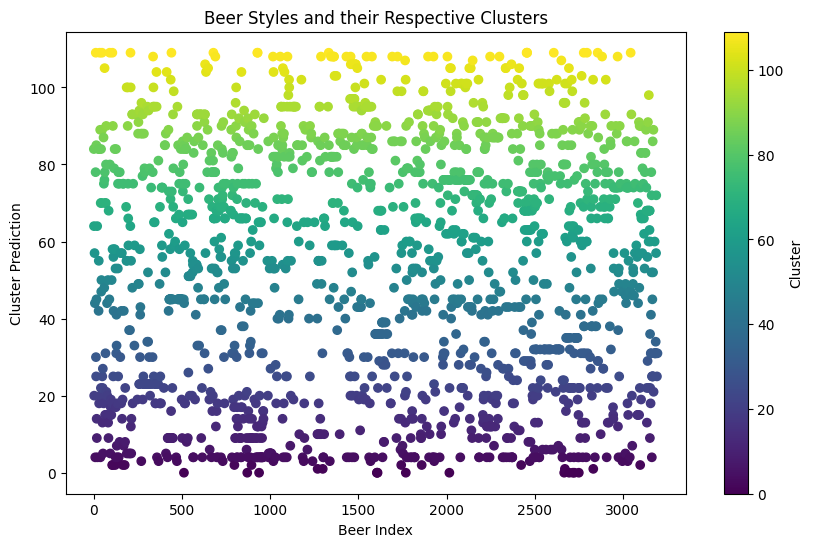

In [ ]:
#Visualization for Report

plt.figure(figsize=(10, 6))
plt.scatter(df_usable.index, df_usable['cluster_prediction'], c=df_usable['cluster_prediction'], cmap='viridis')
plt.title('Beer Styles and their Respective Clusters')
plt.xlabel('Beer Index')
plt.ylabel('Cluster Prediction')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
def predict_beer_style(user_description):

  description_vector = vectorizer.transform([user_description])
  predicted_cluster = kmeans.predict(description_vector)[0]
  predicted_styles = list()

  associated_styles_with_cluster = df_usable[df_usable['cluster_prediction'] == predicted_cluster]['Style']

  for i in range(3):
    if not associated_styles_with_cluster.empty:
      beer_style = associated_styles_with_cluster.mode().iloc[0]
      predicted_styles.append(beer_style)
      associated_styles_with_cluster = associated_styles_with_cluster[associated_styles_with_cluster != beer_style]
    else:
      predicted_styles.append('No more styles recommended')


  return predicted_styles

In [ ]:
user_description = input("Enter a description of the beer: ")
predicted_style = predict_beer_style(user_description)
print()
print("Ranked list of beer styles that best fit your description:")
print("1. ", predicted_style[0])
print("2. ", predicted_style[1])
print("3. ", predicted_style[2])

Enter a description of the beer: fall flavors with pumpkin

Ranked list of beer styles that best fit your description:
1.  Pumpkin Beer
2.  Winter Warmer
3.  Fruit and Field Beer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
